# Data exploration

## Libraries

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Importing the data

In [32]:
df = pd.read_csv('final_df.csv')

In [33]:
df.shape

(1232, 16)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1232 non-null   int64  
 1   product       1232 non-null   object 
 2   brand         1232 non-null   object 
 3   price         1232 non-null   float64
 4   weight        1231 non-null   float64
 5   kj            1232 non-null   float64
 6   kcal          1232 non-null   float64
 7   fat           1219 non-null   float64
 8   sat_fat       1219 non-null   float64
 9   carbs         1231 non-null   float64
 10  sugar         1228 non-null   float64
 11  fibre         525 non-null    float64
 12  protein       1217 non-null   float64
 13  salt          1149 non-null   float64
 14  product_link  1232 non-null   object 
 15  photo_link    1232 non-null   object 
dtypes: float64(11), int64(1), object(4)
memory usage: 154.1+ KB


In [35]:
df.head()

,Unnamed: 0,product,brand,price,weight,kj,kcal,fat,sat_fat,carbs,sugar,fibre,protein,salt,product_link,photo_link
0,0,Soja Protein Crispies 58 % mit Kakao,Koro,14.0,1.0,1535.0,362.0,19.0,4.0,282.0,91.0,18.0,58.0,27.0,https://www.korodrogerie.de/soja-protein-crisp...,https://koro2.imgix.net/media/image/f1/50/81/C...
1,1,Schokodrops mit Xylit,Koro,21.0,1.0,2290.0,555.0,46.0,28.0,31.0,10.0,10.0,92.0,7.0,https://www.korodrogerie.de/schokodrops-mit-xy...,https://koro2.imgix.net/media/image/2c/01/f8/S...
2,2,Schoko Protein Crunchies ohne Zuckerzusatz,Koro,20.0,1.0,1875.0,448.0,28.0,12.0,37.0,14.0,83.0,21.0,36.0,https://www.korodrogerie.de/schoko-protein-cru...,https://koro2.imgix.net/media/image/30/78/62/P...
3,3,Soja Protein Crispies 60 %,Koro,13.0,1.0,1541.0,363.0,18.0,2.0,26.0,8.0,8.0,60.0,32.0,https://www.korodrogerie.de/soja-protein-crisp...,https://koro2.imgix.net/media/image/84/55/ca/C...
4,4,Bohnen-Erbsen-Mix geröstet & gesalzen,Koro,11.5,1.0,1766.0,421.0,14.0,23.0,35.0,67.0,10.0,33.0,10.0,https://www.korodrogerie.de/bohnen-erbsen-mix-...,https://koro2.imgix.net/media/image/a9/37/79/B...


In [36]:
df = df.drop('Unnamed: 0', axis=1)
df.columns

Index(['product', 'brand', 'price', 'weight', 'kj', 'kcal', 'fat', 'sat_fat',
       'carbs', 'sugar', 'fibre', 'protein', 'salt', 'product_link',
       'photo_link'],
      dtype='object')

## Exploratory analysis

In [37]:
df.describe()

,price,weight,kj,kcal,fat,sat_fat,carbs,sugar,fibre,protein,salt
count,1232.000000,1231.000000,1232.000000,1232.000000,1219.000000,1219.000000,1231.000000,1228.000000,525.000000,1217.000000,1149.000000
mean,9.619911,0.745199,1901.398214,460.241153,25.048388,13.236317,52.588221,36.106147,24.904762,13.679228,3.885619
std,27.369946,5.782567,470.700296,161.850517,18.271924,14.727172,34.574484,130.305483,27.946397,22.682713,14.750498
min,0.490000,0.000578,12.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.990000,0.040000,1572.000000,378.000000,13.000000,2.000000,39.200000,19.000000,7.000000,4.500000,0.020000
50%,2.890000,0.075000,1879.000000,449.000000,23.000000,9.000000,50.000000,32.000000,12.000000,7.600000,0.180000
75%,4.990000,0.140000,2289.000000,551.000000,38.050000,21.750000,63.000000,44.000000,34.000000,13.000000,1.000000
max,330.500000,108.000000,3096.000000,4123.000000,171.000000,107.000000,662.000000,4532.000000,159.000000,465.000000,275.000000


## Visualization

### Distribution

In [39]:
def showing_count_hue(df, in_columns=[], skip_columns=[], target=''):
    for col in df.columns:
        if col in in_columns:
            if col not in skip_columns:
                sns.countplot(df[col], hue=target, data=df)
                plt.show()

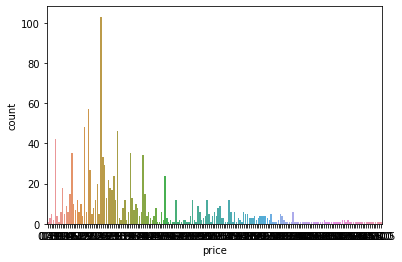

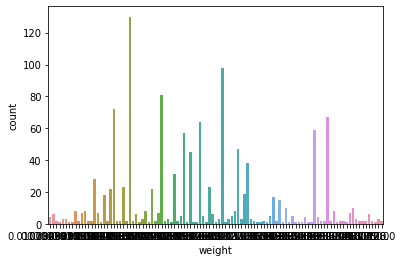

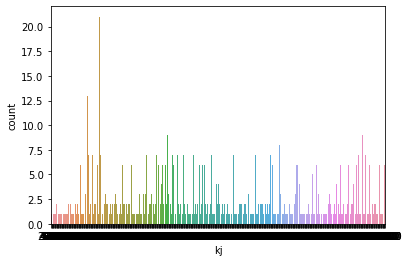

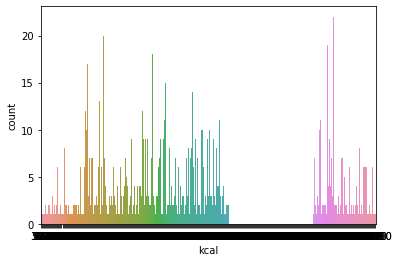

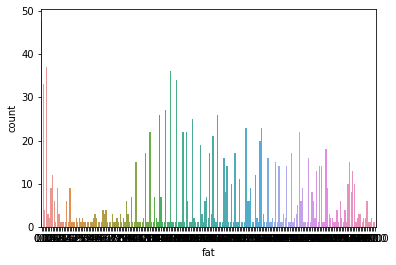

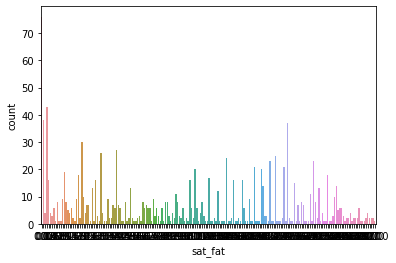

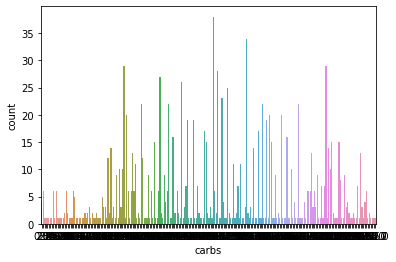

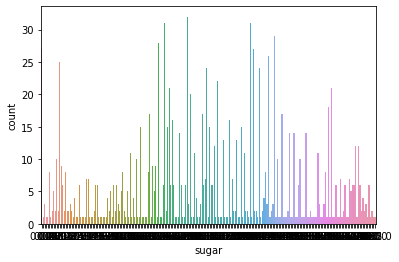

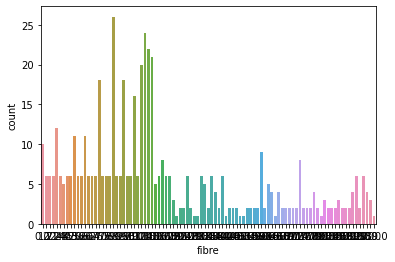

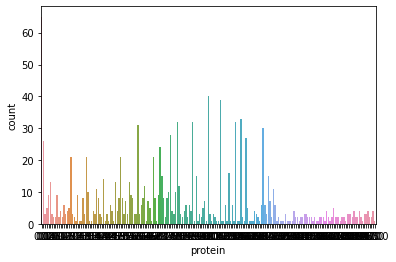

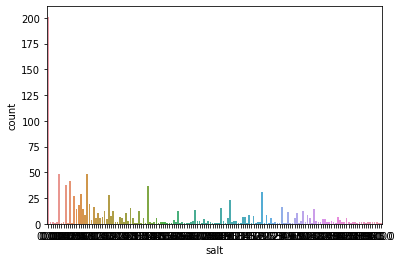

In [40]:
showing_count_hue(df, in_columns=df.select_dtypes(np.number), skip_columns=[], target=None)

In [41]:
def showing_dist(df):
    for col in df.select_dtypes(np.number):
        sns.distplot(df[col])
        plt.show()

In [52]:
def showing_dist_box(df):
   
    for col in df.columns:
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        # sns.set_style("darkgrid")

        sns.distplot(df[col], ax=axes[0])
        sns.boxplot(df[col], ax=axes[1])
        
        plt.show()

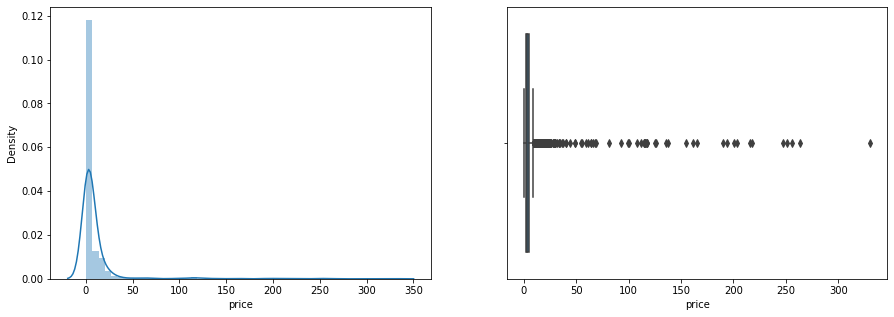

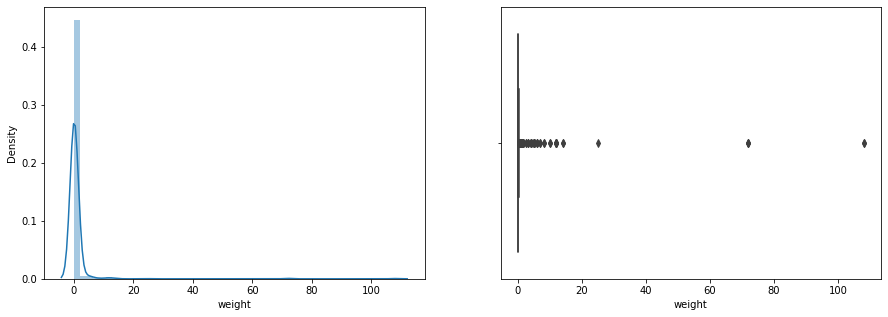

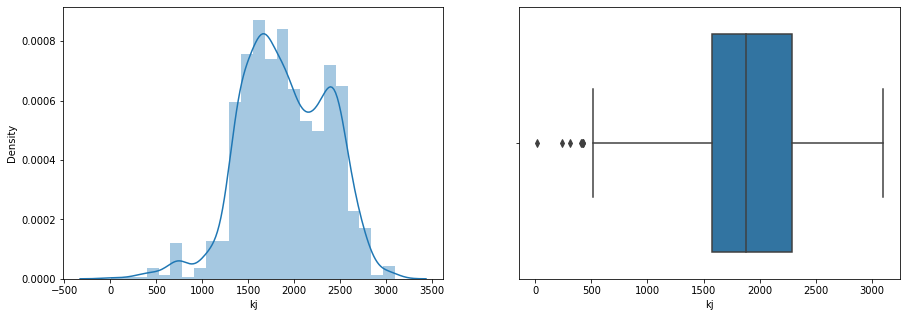

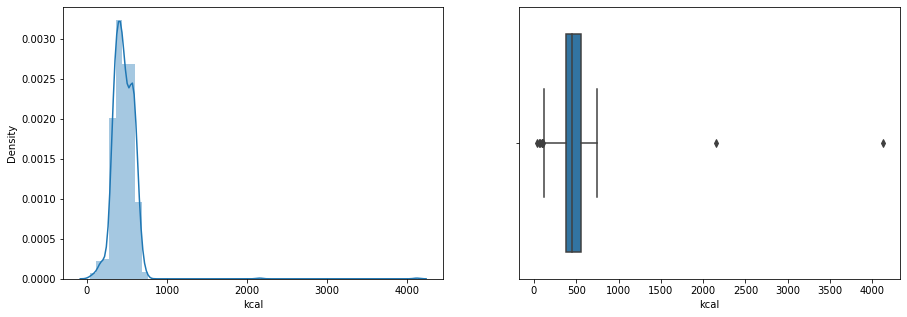

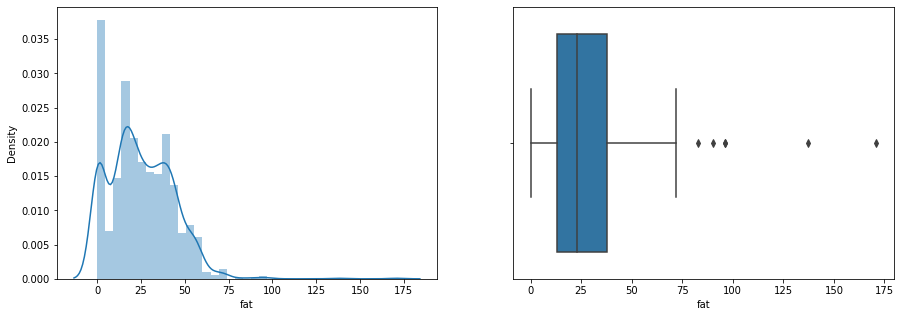

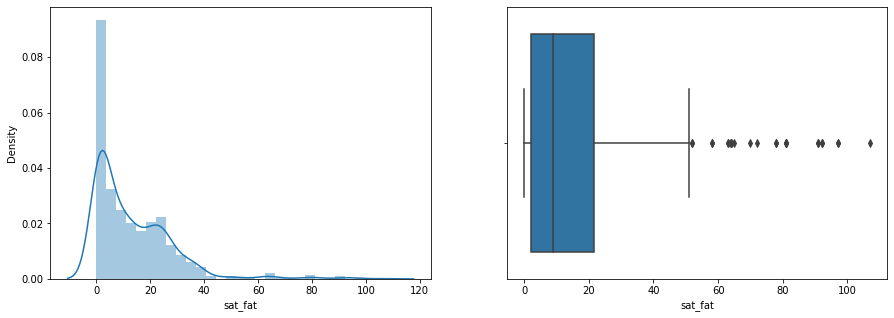

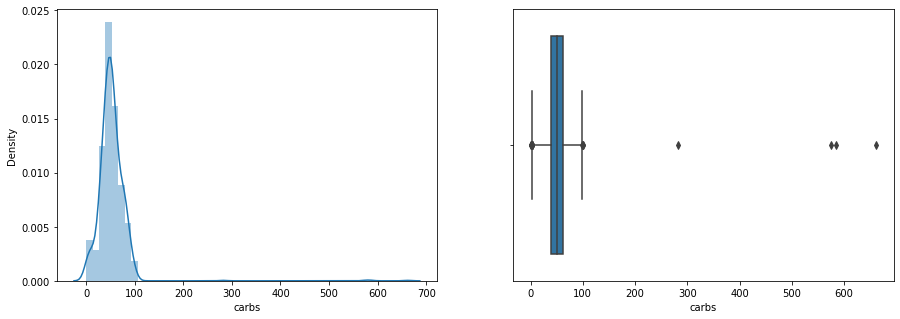

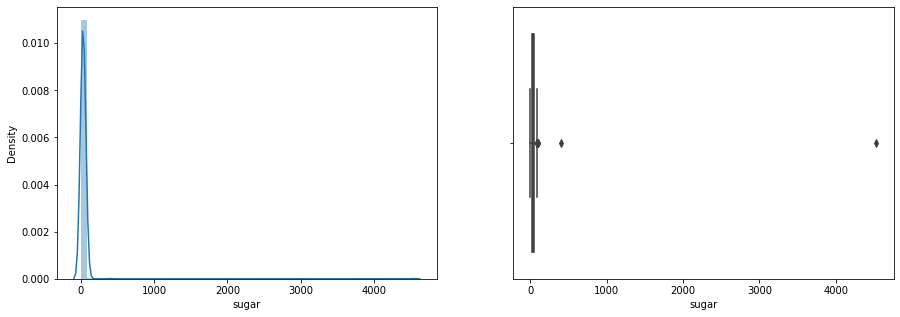

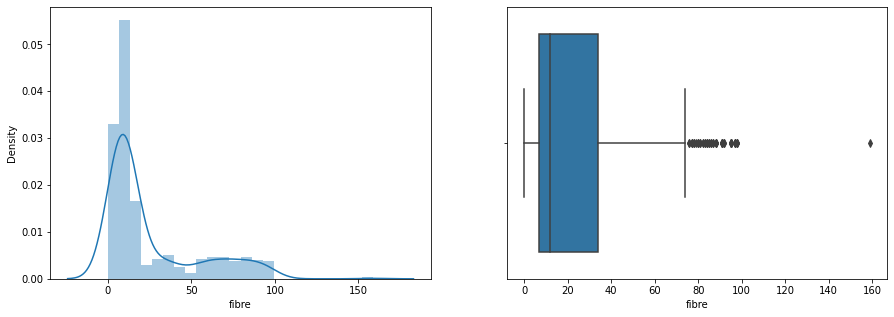

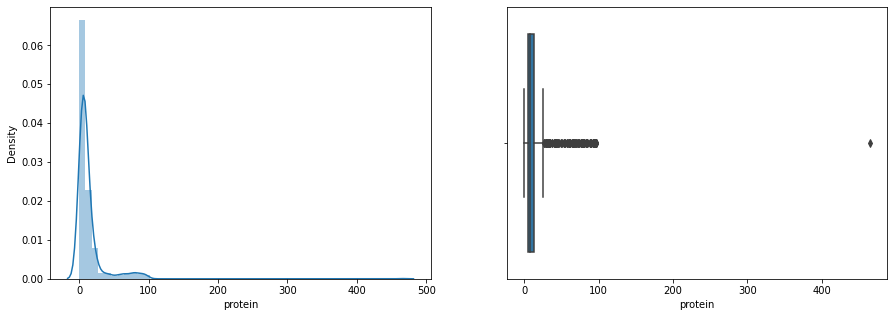

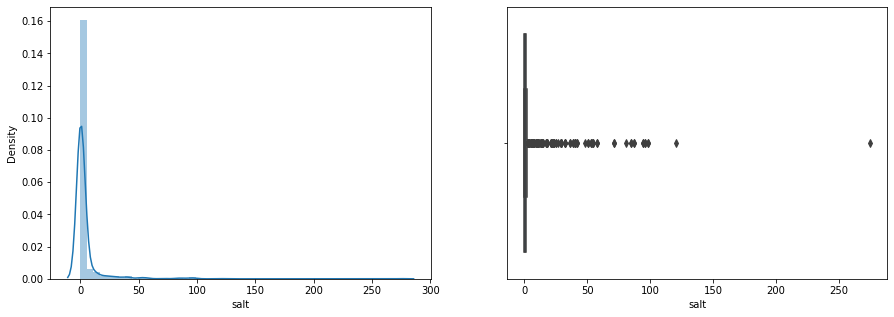

In [53]:
showing_dist_box(df.select_dtypes(np.number))

### 

In [20]:
fig = px.scatter(df, x="price", y="kcal", color="brand")
fig.show()